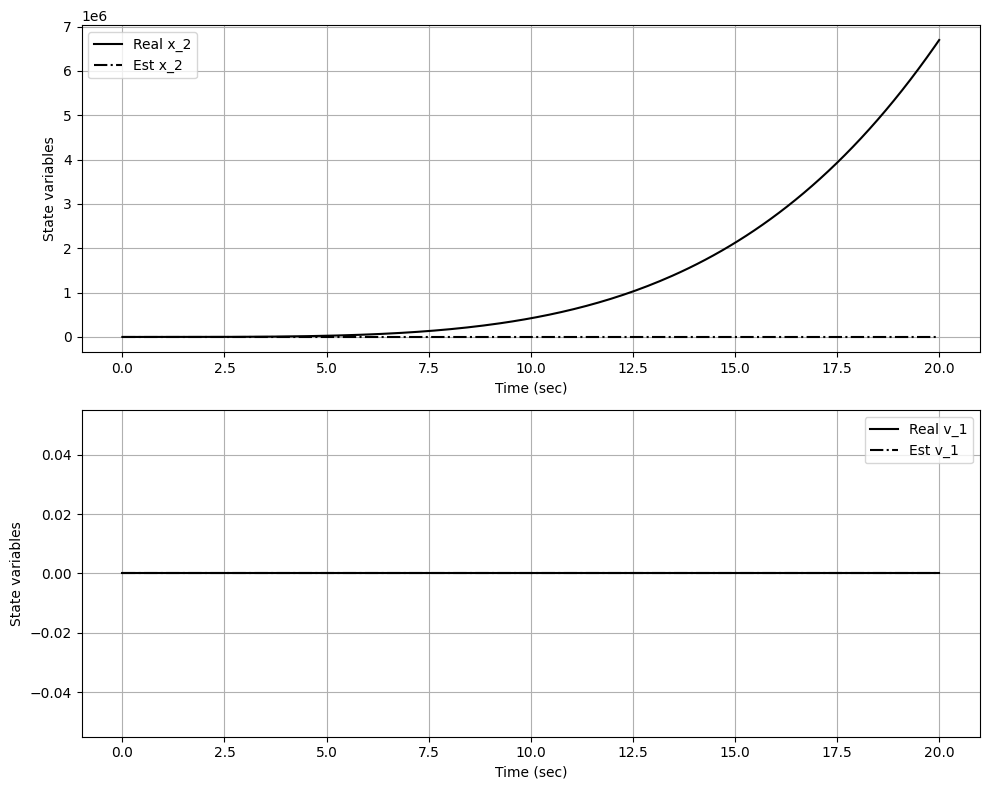

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
F = 1000

# Initial conditions
x0 = np.array([0, 20, 20, 20, 20, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=float)

# Time span
tspan = np.linspace(0, 20, 200)

# Define the train model differential equations
def train_model_Obs(x, t):
    # State variables
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    x5 = x[4]
    v1 = x[5]
    v2 = x[6]
    v3 = x[7]
    v4 = x[8]
    
    # Define differential equations
    dxdt = np.zeros_like(x)
    dxdt[0] = x2  # dx1/dt = x2
    dxdt[1] = x3  # dx2/dt = x3
    dxdt[2] = x4  # dx3/dt = x4
    dxdt[3] = x5  # dx4/dt = x5
    dxdt[4] = F   # dx5/dt = F
    dxdt[5] = 0   # dv1/dt = 0
    dxdt[6] = 0   # dv2/dt = 0
    dxdt[7] = 0   # dv3/dt = 0
    dxdt[8] = 0   # dv4/dt = 0
    
    return dxdt

# Solve the differential equations
x = odeint(train_model_Obs, x0, tspan)

# Extract estimated states
xh = x[:, 10:18]

# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(211)
plt.plot(tspan, x[:, 1] - 20, 'k', label='Real x_2')
plt.plot(tspan, xh[:, 0], 'k-.', label='Est x_2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()

plt.subplot(212)
plt.plot(tspan, x[:, 5], 'k', label='Real v_1')
plt.plot(tspan, xh[:, 4], 'k-.', label='Est v_1')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()

plt.tight_layout()
plt.show()
